In [1]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
%matplotlib inline

In [10]:
data = pd.read_csv('Cars93.csv')
x = data[['Horsepower', 'Turn.circle', 'MPG.highway']]
y = data['Price'].values.reshape(-1,1)

**Ejercicio 7.1**


In [11]:
n = 5000
beta_0 = np.ones(n)
beta_1 = np.ones(n)
beta_2 = np.ones(n)
beta_3 = np.ones(n)
r2_train = np.ones(n)
r2_val = np.ones(n)

linear = sklearn.linear_model.LinearRegression()

for i in range(n):
    x_train, x_val, y_train, y_val = sklearn.model_selection.train_test_split(x, y, test_size=0.5)
    linear.fit(x_train, y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    beta_3[i] = linear.coef_[0][2]
    r2_train[i] = linear.score(x_train, y_train)
    r2_val[i] = linear.score(x_val, y_val)    

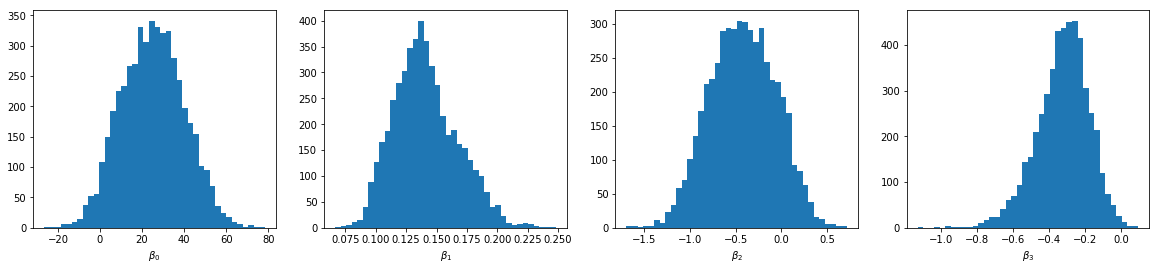

In [14]:
plt.figure(figsize=(20,4))

plt.subplot(141)
_ = plt.hist(beta_0, bins=40)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(142)
_ = plt.hist(beta_1, bins=40)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(143)
_ = plt.hist(beta_2, bins=40)
_ = plt.xlabel(r'$\beta_2$')

plt.subplot(144)
_ = plt.hist(beta_3, bins=40)
_ = plt.xlabel(r'$\beta_3$')

In [15]:
print('beta 0 {} +/- {}'.format(beta_0.mean(), beta_0.std() ))
print('beta 1 {} +/- {}'.format(beta_1.mean(), beta_1.std() ))
print('beta 2 {} +/- {}'.format(beta_2.mean(), beta_2.std() ))
print('beta 3 {} +/- {}'.format(beta_3.mean(), beta_3.std() ))

beta 0 25.071081386324025 +/- 14.91461162044016
beta 1 0.14105860363124043 +/- 0.02626544755174653
beta 2 -0.4221792341367296 +/- 0.3607382251763288
beta 3 -0.32388060013593123 +/- 0.14581028702522741


En este caso $\beta_0$ y $\beta_3$ son consistentes con cero.

**Ejercicio 7.2**

In [69]:
def model(x,beta_0,beta_1,beta_2,beta_3):
    return beta_0 + beta_1*np.array(x['Horsepower']) + beta_2*np.array(x['Turn.circle']) + beta_3*np.array(x['MPG.highway'])

def loglk(x,y,beta_0,beta_1,beta_2,beta_3):
    y_model = model(x,beta_0,beta_1,beta_2,beta_3)
    p = y_model * np.exp(-(y_model/y))
    p = p/(y**2)
    return np.log(np.sum(p))

def logprior(beta_0,beta_1,beta_2,beta_3):
    p = -np.inf
    if beta_0 < 80 and beta_0 >-30 and beta_1 >-0.5 and beta_1<0.5 and beta_2<2 and beta_2>-2 and beta_3<1 and beta_3>-2:
        p = 0.0
    return p

In [70]:
N = 50000
lista_b0 = [np.random.random()]
lista_b1 = [np.random.random()]
lista_b2 = [np.random.random()]
lista_b3 = [np.random.random()]
logposterior = [loglk(x, y, lista_b0[0], lista_b1[0], lista_b2[0], lista_b3[0]) + logprior(lista_b0[0], lista_b1[0], lista_b2[0], lista_b3[0])]

sigma_delta_b0 = 0.2
sigma_delta_b1 = 0.2
sigma_delta_b2 = 0.2
sigma_delta_b3 = 0.2

for i in range(1,N):
    propuesta_b0  = lista_b0[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b0)
    propuesta_b1 = lista_b1[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b1)
    propuesta_b2 = lista_b2[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b2)
    propuesta_b3 = lista_b3[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b3)

    logposterior_viejo = loglk(x, y, lista_b0[i-1], lista_b1[i-1],lista_b2[i-1], lista_b3[i-1]) + logprior(lista_b0[i-1], lista_b1[i-1],lista_b2[i-1], lista_b3[i-1])
    logposterior_nuevo = loglk(x, y, propuesta_b0, propuesta_b1, propuesta_b2, propuesta_b3) + logprior(propuesta_b0, propuesta_b1, propuesta_b2, propuesta_b3)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        lista_b0.append(propuesta_b0)
        lista_b1.append(propuesta_b1)
        lista_b2.append(propuesta_b2)
        lista_b3.append(propuesta_b3)
        logposterior.append(logposterior_nuevo)
    else:
        lista_b0.append(lista_b0[i-1])
        lista_b1.append(lista_b1[i-1])
        lista_b2.append(lista_b2[i-1])
        lista_b3.append(lista_b3[i-1])
        logposterior.append(logposterior_viejo)
lista_b0 = np.array(lista_b0)
lista_b1 = np.array(lista_b1)
lista_b2 = np.array(lista_b2)
lista_b3 = np.array(lista_b3)
logposterior = np.array(logposterior)

/home/mneira011/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/mneira011/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


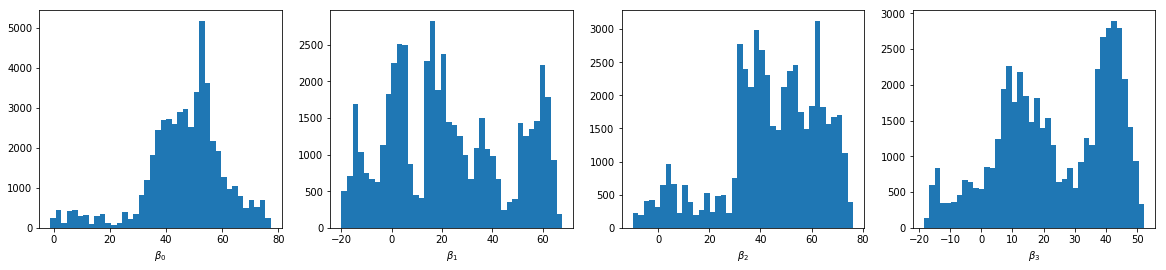

In [71]:
plt.figure(figsize=(20,4))

plt.subplot(141)
_ = plt.hist(lista_b0, bins=40)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(142)
_ = plt.hist(lista_b1, bins=40)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(143)
_ = plt.hist(lista_b2, bins=40)
_ = plt.xlabel(r'$\beta_2$')

plt.subplot(144)
_ = plt.hist(lista_b3, bins=40)
_ = plt.xlabel(r'$\beta_3$')

In [72]:
print('beta 0 {} +/- {}'.format(lista_b0.mean(), lista_b0.std() ))
print('beta 1 {} +/- {}'.format(lista_b1.mean(), lista_b1.std() ))
print('beta 2 {} +/- {}'.format(lista_b2.mean(), lista_b2.std() ))
print('beta 3 {} +/- {}'.format(lista_b3.mean(), lista_b3.std() ))

beta 0 46.52220156589122 +/- 14.258613680296483
beta 1 22.680010627604624 +/- 23.75758027764315
beta 2 44.39488570584022 +/- 19.215856659079193
beta 3 23.59044838169921 +/- 17.920719985007857


Los resultados por el metodo MCMC no son consistentes con los resultados de bootstraping.

**Ejercicio 7.3**

In [75]:
x = data[['MPG.city', 'MPG.highway', 'EngineSize', 
   'Horsepower', 'RPM', 'Rev.per.mile',
   'Fuel.tank.capacity', 'Passengers', 'Length',
   'Wheelbase', 'Width', 'Turn.circle', 'Weight']]
y = data['Price'].values.reshape(-1,1)

In [76]:
n = 5000
betas = np.ones([n,x.shape[1]+1])
r2_train = np.ones(n)
r2_val = np.ones(n)

linear = sklearn.linear_model.LinearRegression()

for i in range(n):
    x_train, x_val, y_train, y_val = sklearn.model_selection.train_test_split(x, y, test_size=0.5)
    linear.fit(x_train, y_train)
    betas[i][0] = linear.intercept_[0]
    for j in range(1,x.shape[1]):
        betas[i][j] = linear.coef_[0][j]
    r2_train[i] = linear.score(x_train, y_train)
    r2_val[i] = linear.score(x_val, y_val)   

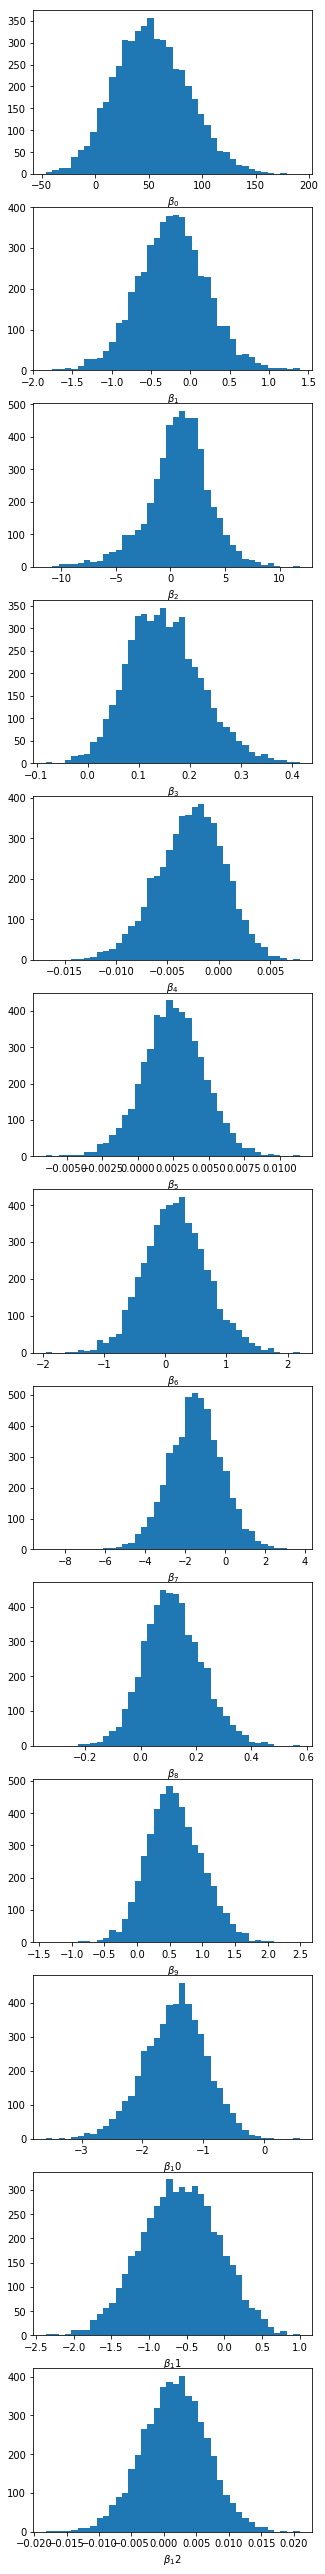

In [78]:
plt.figure(figsize=(5,50))
for i in range(0,x.shape[1]):
    plt.subplot(14,1,i+1)
    _ = plt.hist(betas[:,i], bins=40)
    _ = plt.xlabel(r'$\beta_{}$'.format(i))

Los $\beta$ no consistentes con cero, son: $\beta_0$, $\beta_4$, $\beta_8$, $\beta_9$, $\beta_{10}$, $\beta_{11}$, $\beta_{12}$. 

El modelo queda:
Price = $\beta_0$, $\beta_4$$\times$Horsepower, $\beta_8$$\times$Passangers, $\beta_9$$\times$lenght, $\beta_{10}$$\times$Wheelbase, $\beta_{11}$$\times$width, $\beta_{12}$$\times$Turn.circle.